<a href="https://colab.research.google.com/github/Vonewman/Deep_Learning_models_with_pytorch/blob/master/Linear_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

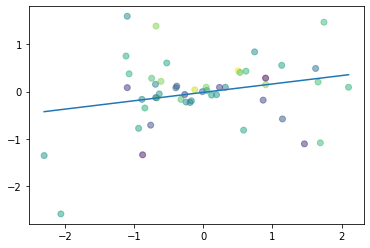

In [107]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# Linear Regression in PyTorch

In [108]:
x_values = [i for i in range(11)]

In [109]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [110]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [111]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [112]:
y_values = [2*i + 1 for i in x_values]

In [113]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [114]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [115]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [116]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [117]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [118]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [119]:
criterion = nn.MSELoss()

In [120]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [121]:
epochs = 100

In [122]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {} '.format(epoch), 'loss %.3f%%' % (loss.item() * 100))

epoch 1  loss 23592.821%
epoch 2  loss 1924.399%
epoch 3  loss 156.974%
epoch 4  loss 12.811%
epoch 5  loss 1.052%
epoch 6  loss 0.093%
epoch 7  loss 0.015%
epoch 8  loss 0.008%
epoch 9  loss 0.007%
epoch 10  loss 0.007%
epoch 11  loss 0.007%
epoch 12  loss 0.007%
epoch 13  loss 0.007%
epoch 14  loss 0.007%
epoch 15  loss 0.007%
epoch 16  loss 0.007%
epoch 17  loss 0.007%
epoch 18  loss 0.007%
epoch 19  loss 0.007%
epoch 20  loss 0.007%
epoch 21  loss 0.006%
epoch 22  loss 0.006%
epoch 23  loss 0.006%
epoch 24  loss 0.006%
epoch 25  loss 0.006%
epoch 26  loss 0.006%
epoch 27  loss 0.006%
epoch 28  loss 0.006%
epoch 29  loss 0.006%
epoch 30  loss 0.006%
epoch 31  loss 0.006%
epoch 32  loss 0.006%
epoch 33  loss 0.006%
epoch 34  loss 0.006%
epoch 35  loss 0.006%
epoch 36  loss 0.005%
epoch 37  loss 0.005%
epoch 38  loss 0.005%
epoch 39  loss 0.005%
epoch 40  loss 0.005%
epoch 41  loss 0.005%
epoch 42  loss 0.005%
epoch 43  loss 0.005%
epoch 44  loss 0.005%
epoch 45  loss 0.005%
epoch 46 

In [123]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.9904093],
       [ 2.9917905],
       [ 4.9931717],
       [ 6.994553 ],
       [ 8.995934 ],
       [10.997314 ],
       [12.998696 ],
       [15.000077 ],
       [17.00146  ],
       [19.00284  ],
       [21.004221 ]], dtype=float32)

In [124]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

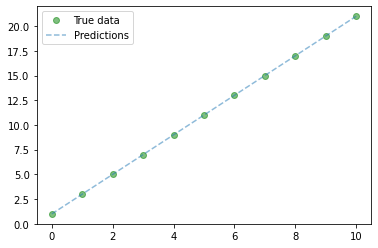

In [125]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [126]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [127]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

# Linear Regression From CPU to GPU in PyTorch

In [128]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

In [129]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}'.format(epoch), 'loss %.3f%%' % (loss.item() * 100))

epoch 1 loss 18346.727%
epoch 2 loss 1497.358%
epoch 3 loss 122.998%
epoch 4 loss 10.887%
epoch 5 loss 1.732%
epoch 6 loss 0.976%
epoch 7 loss 0.905%
epoch 8 loss 0.890%
epoch 9 loss 0.880%
epoch 10 loss 0.870%
epoch 11 loss 0.860%
epoch 12 loss 0.851%
epoch 13 loss 0.841%
epoch 14 loss 0.832%
epoch 15 loss 0.823%
epoch 16 loss 0.813%
epoch 17 loss 0.804%
epoch 18 loss 0.795%
epoch 19 loss 0.787%
epoch 20 loss 0.778%
epoch 21 loss 0.769%
epoch 22 loss 0.760%
epoch 23 loss 0.752%
epoch 24 loss 0.744%
epoch 25 loss 0.735%
epoch 26 loss 0.727%
epoch 27 loss 0.719%
epoch 28 loss 0.711%
epoch 29 loss 0.703%
epoch 30 loss 0.695%
epoch 31 loss 0.687%
epoch 32 loss 0.680%
epoch 33 loss 0.672%
epoch 34 loss 0.665%
epoch 35 loss 0.657%
epoch 36 loss 0.650%
epoch 37 loss 0.643%
epoch 38 loss 0.635%
epoch 39 loss 0.628%
epoch 40 loss 0.621%
epoch 41 loss 0.614%
epoch 42 loss 0.607%
epoch 43 loss 0.601%
epoch 44 loss 0.594%
epoch 45 loss 0.587%
epoch 46 loss 0.581%
epoch 47 loss 0.574%
epoch 48 los